In [1]:
import csv
import numpy as np
import pandas as pd
import pickle
from collections import defaultdict
from sklearn.naive_bayes import MultinomialNB

In [2]:
# read in the raw scraped data
data = pd.read_csv('cleaned_dataset.csv')
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,weight_Symptom_10,weight_Symptom_11,weight_Symptom_12,weight_Symptom_13,weight_Symptom_14,weight_Symptom_15,weight_Symptom_16,weight_Symptom_17,Total_Severity,Disease_Encoded
0,fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,...,4,2,6,6,7,7,5,2,67.0,15
1,fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,...,4,2,6,6,7,7,5,2,73.0,15
2,fungal infection,itching,nodal_skin_eruptions,dischromic _patches,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,...,4,2,6,6,7,7,5,2,71.0,15
3,fungal infection,itching,skin_rash,dischromic _patches,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,...,4,2,6,6,7,7,5,2,70.0,15
4,fungal infection,itching,skin_rash,nodal_skin_eruptions,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,...,4,2,6,6,7,7,5,2,74.0,15


In [3]:
# Check the shape (rows, columns) of the dataset
print("Shape of the dataset:", data.shape)
# Check column names
print("Columns:", data.columns.tolist())
# Display summary statistics
print(data.describe())
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

Shape of the dataset: (309, 37)
Columns: ['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17', 'weight', 'weight_Symptom_2', 'weight_Symptom_3', 'weight_Symptom_4', 'weight_Symptom_5', 'weight_Symptom_6', 'weight_Symptom_7', 'weight_Symptom_8', 'weight_Symptom_9', 'weight_Symptom_10', 'weight_Symptom_11', 'weight_Symptom_12', 'weight_Symptom_13', 'weight_Symptom_14', 'weight_Symptom_15', 'weight_Symptom_16', 'weight_Symptom_17', 'Total_Severity', 'Disease_Encoded']
           weight  weight_Symptom_2  weight_Symptom_3  weight_Symptom_4  \
count  309.000000        307.000000        304.000000        304.000000   
mean     3.433657          4.123779          4.134868          4.532895   
std      1.299213          1.148025          1.321903          1.654747   
min      1.000000          2.000000        

In [5]:
# Shape of dataset
print("Shape:", data.shape)
# Column names
print("Columns:", data.columns.tolist())
# Data types and missing values
print(data.info())
# Basic statistics for numeric columns
print(data.describe())

Shape: (309, 37)
Columns: ['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17', 'weight', 'weight_Symptom_2', 'weight_Symptom_3', 'weight_Symptom_4', 'weight_Symptom_5', 'weight_Symptom_6', 'weight_Symptom_7', 'weight_Symptom_8', 'weight_Symptom_9', 'weight_Symptom_10', 'weight_Symptom_11', 'weight_Symptom_12', 'weight_Symptom_13', 'weight_Symptom_14', 'weight_Symptom_15', 'weight_Symptom_16', 'weight_Symptom_17', 'Total_Severity', 'Disease_Encoded']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Disease            309 non-null    object 
 1   Symptom_1          309 non-null    object 
 2   Symptom_2          309 non-null    object 
 3   Symptom_

In [8]:
# Check unique values in symptom-related columns
for col in data.columns:
    print(f"{col} - {data[col].nunique()} unique values")

Disease - 41 unique values
Symptom_1 - 34 unique values
Symptom_2 - 48 unique values
Symptom_3 - 54 unique values
Symptom_4 - 50 unique values
Symptom_5 - 38 unique values
Symptom_6 - 32 unique values
Symptom_7 - 26 unique values
Symptom_8 - 21 unique values
Symptom_9 - 22 unique values
Symptom_10 - 21 unique values
Symptom_11 - 18 unique values
Symptom_12 - 11 unique values
Symptom_13 - 8 unique values
Symptom_14 - 4 unique values
Symptom_15 - 3 unique values
Symptom_16 - 3 unique values
Symptom_17 - 1 unique values
weight - 7 unique values
weight_Symptom_2 - 6 unique values
weight_Symptom_3 - 6 unique values
weight_Symptom_4 - 6 unique values
weight_Symptom_5 - 6 unique values
weight_Symptom_6 - 6 unique values
weight_Symptom_7 - 5 unique values
weight_Symptom_8 - 6 unique values
weight_Symptom_9 - 6 unique values
weight_Symptom_10 - 5 unique values
weight_Symptom_11 - 6 unique values
weight_Symptom_12 - 5 unique values
weight_Symptom_13 - 4 unique values
weight_Symptom_14 - 3 unique

In [9]:
data.columns = data.columns.str.strip() # remove leading/trailing spaces

In [10]:
print(data.columns)

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17', 'weight', 'weight_Symptom_2',
       'weight_Symptom_3', 'weight_Symptom_4', 'weight_Symptom_5',
       'weight_Symptom_6', 'weight_Symptom_7', 'weight_Symptom_8',
       'weight_Symptom_9', 'weight_Symptom_10', 'weight_Symptom_11',
       'weight_Symptom_12', 'weight_Symptom_13', 'weight_Symptom_14',
       'weight_Symptom_15', 'weight_Symptom_16', 'weight_Symptom_17',
       'Total_Severity', 'Disease_Encoded'],
      dtype='object')


In [11]:
print(data.columns.tolist()) # Verify column names

['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17', 'weight', 'weight_Symptom_2', 'weight_Symptom_3', 'weight_Symptom_4', 'weight_Symptom_5', 'weight_Symptom_6', 'weight_Symptom_7', 'weight_Symptom_8', 'weight_Symptom_9', 'weight_Symptom_10', 'weight_Symptom_11', 'weight_Symptom_12', 'weight_Symptom_13', 'weight_Symptom_14', 'weight_Symptom_15', 'weight_Symptom_16', 'weight_Symptom_17', 'Total_Severity', 'Disease_Encoded']


In [12]:
# Print all column names
print("Columns in the dataset:", data.columns.tolist())

Columns in the dataset: ['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17', 'weight', 'weight_Symptom_2', 'weight_Symptom_3', 'weight_Symptom_4', 'weight_Symptom_5', 'weight_Symptom_6', 'weight_Symptom_7', 'weight_Symptom_8', 'weight_Symptom_9', 'weight_Symptom_10', 'weight_Symptom_11', 'weight_Symptom_12', 'weight_Symptom_13', 'weight_Symptom_14', 'weight_Symptom_15', 'weight_Symptom_16', 'weight_Symptom_17', 'Total_Severity', 'Disease_Encoded']


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Load dataset
data = pd.read_csv('cleaned_dataset.csv')
print(data.head()) # Check columns and sample data

            Disease  Symptom_1             Symptom_2             Symptom_3  \
0  fungal infection    itching             skin_rash  nodal_skin_eruptions   
1  fungal infection  skin_rash  nodal_skin_eruptions   dischromic _patches   
2  fungal infection    itching  nodal_skin_eruptions   dischromic _patches   
3  fungal infection    itching             skin_rash   dischromic _patches   
4  fungal infection    itching             skin_rash  nodal_skin_eruptions   

             Symptom_4 Symptom_5 Symptom_6       Symptom_7       Symptom_8  \
0  dischromic _patches  headache    nausea  abdominal_pain  abdominal_pain   
1           high_fever  headache    nausea  abdominal_pain  abdominal_pain   
2           high_fever  headache    nausea  abdominal_pain  abdominal_pain   
3           high_fever  headache    nausea  abdominal_pain  abdominal_pain   
4           high_fever  headache    nausea  abdominal_pain  abdominal_pain   

           Symptom_9  ... weight_Symptom_10 weight_Symptom_11 

In [14]:
print("All columns in your dataset:")
print(data.columns.tolist())

All columns in your dataset:
['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17', 'weight', 'weight_Symptom_2', 'weight_Symptom_3', 'weight_Symptom_4', 'weight_Symptom_5', 'weight_Symptom_6', 'weight_Symptom_7', 'weight_Symptom_8', 'weight_Symptom_9', 'weight_Symptom_10', 'weight_Symptom_11', 'weight_Symptom_12', 'weight_Symptom_13', 'weight_Symptom_14', 'weight_Symptom_15', 'weight_Symptom_16', 'weight_Symptom_17', 'Total_Severity', 'Disease_Encoded']


In [15]:
data = data.fillna(method='ffill')
data.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15924\2941326173.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,weight_Symptom_10,weight_Symptom_11,weight_Symptom_12,weight_Symptom_13,weight_Symptom_14,weight_Symptom_15,weight_Symptom_16,weight_Symptom_17,Total_Severity,Disease_Encoded
0,fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,...,4,2,6,6,7,7,5,2,67.0,15
1,fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,...,4,2,6,6,7,7,5,2,73.0,15
2,fungal infection,itching,nodal_skin_eruptions,dischromic _patches,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,...,4,2,6,6,7,7,5,2,71.0,15
3,fungal infection,itching,skin_rash,dischromic _patches,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,...,4,2,6,6,7,7,5,2,70.0,15
4,fungal infection,itching,skin_rash,nodal_skin_eruptions,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,...,4,2,6,6,7,7,5,2,74.0,15


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("cleaned_dataset.csv")

# Define features and target
features = [
    'weight', 'weight_Symptom_2', 'weight_Symptom_3', 'weight_Symptom_4',
    'weight_Symptom_5', 'weight_Symptom_6', 'weight_Symptom_7', 'weight_Symptom_8',
    'weight_Symptom_9', 'weight_Symptom_10', 'weight_Symptom_11', 'weight_Symptom_12',
    'weight_Symptom_13', 'weight_Symptom_14', 'weight_Symptom_15',
    'weight_Symptom_16', 'weight_Symptom_17', 'Total_Severity'
]
target = 'Disease_Encoded'

# Drop missing values
data = data[features + [target]].dropna()

# Remove classes with fewer than 2 samples
valid_classes = data[target].value_counts()[lambda x: x >= 2].index
data = data[data[target].isin(valid_classes)]

# Separate features and target
X = data[features]
y = data[target]

# Scale features for better convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Train logistic regression model
model = LogisticRegression(max_iter=3000, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy: {:.2f}%".format(accuracy * 100))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Correlation Matrix
print("\nCorrelation Matrix:")
correlation_matrix = pd.DataFrame(X_scaled, columns=features).corr()
print(correlation_matrix.round(2))




Accuracy: 66.10%

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       1.00      0.50      0.67         2
           9       0.33      0.50      0.40         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      0.50      0.67         2
          13       0.50      1.00      0.67         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with 


Accuracy: 67.80%

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.33      1.00      0.50         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       1.00      0.50      0.67         2
           9       0.33      0.50      0.40         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      0.50      0.67         2
          13       0.50      1.00      0.67         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      

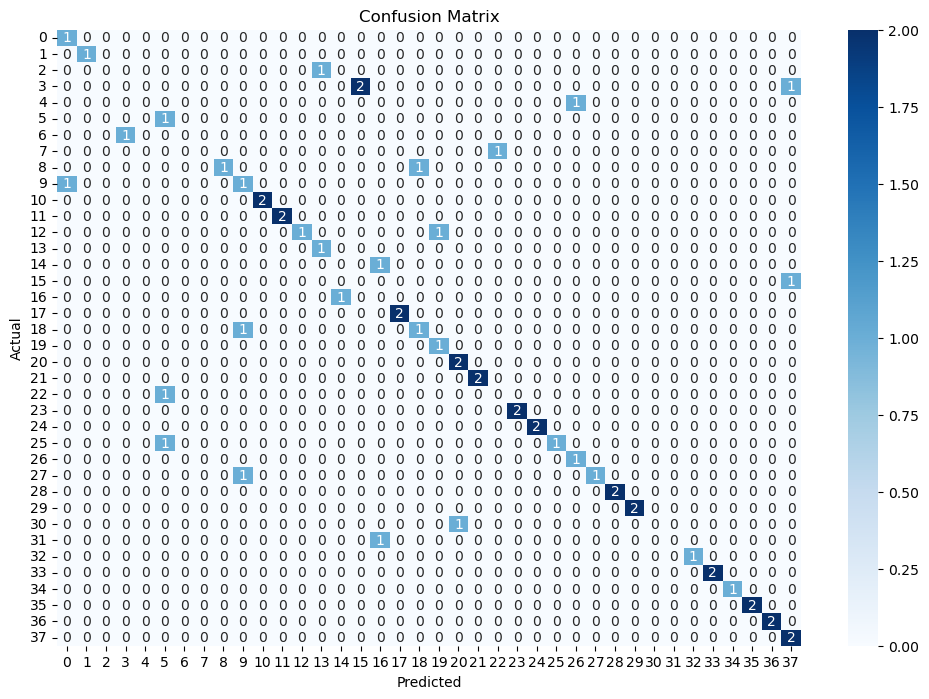

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("cleaned_dataset.csv")

# Define features and target
features = [
    'weight', 'weight_Symptom_2', 'weight_Symptom_3', 'weight_Symptom_4',
    'weight_Symptom_5', 'weight_Symptom_6', 'weight_Symptom_7', 'weight_Symptom_8',
    'weight_Symptom_9', 'weight_Symptom_10', 'weight_Symptom_11', 'weight_Symptom_12',
    'weight_Symptom_13', 'weight_Symptom_14', 'weight_Symptom_15',
    'weight_Symptom_16', 'weight_Symptom_17', 'Total_Severity'
]
target = 'Disease_Encoded'

# Drop missing values
data = data[features + [target]].dropna()

# Remove classes with fewer than 2 samples
valid_classes = data[target].value_counts()[lambda x: x >= 2].index
data = data[data[target].isin(valid_classes)]

# Split data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train model
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy: {:.2f}%".format(accuracy * 100))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Correlation Matrix
print("\nCorrelation Matrix:")
correlation_matrix = X.corr()
print(correlation_matrix.round(2))

# Confusion Matrix Plot (optional)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, precision_score, recall_score)
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
def load_data():
    data = pd.read_csv("cleaned_dataset.csv")

    # Expanded feature set
    features = [col for col in data.columns if col.startswith('weight_Symptom_') or col in ['weight', 'Total_Severity']]
    target = 'Disease_Encoded'

    # Filter rare classes (minimum 5 samples)
    model_data = data[features + [target]].dropna()
    class_counts = model_data[target].value_counts()
    valid_classes = class_counts[class_counts >= 5].index
    model_data = model_data[model_data[target].isin(valid_classes)]

    return model_data, features, target

# Feature engineering
def engineer_features(df):
    symptom_cols = [col for col in df.columns if 'weight_Symptom_' in col]
    df['severity_per_symptom'] = df['Total_Severity'] / (df[symptom_cols].gt(0).sum(axis=1) + 1)
    df['symptom_count'] = df[symptom_cols].gt(0).sum(axis=1)
    return df

# Build model pipeline
def build_model_pipeline():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selector', SelectKBest(score_func=mutual_info_classif, k=15)),
        ('pca', PCA(n_components=0.95)),
        ('classifier', GaussianNB())
    ])
    return pipeline

# Ensemble model
def build_ensemble():
    models = [
        ('nb', GaussianNB()),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
    ]
    ensemble = VotingClassifier(estimators=models, voting='soft')
    return ensemble

# Main execution
if __name__ == "__main__":
    # Load and prepare data
    model_data, features, target = load_data()
    model_data = engineer_features(model_data)

    # Update features after engineering
    features = [col for col in model_data.columns if col != target]

    X = model_data[features]
    y = model_data[target]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Model 1: Optimized Naive Bayes
    print("Training Optimized Naive Bayes...")
    nb_pipeline = build_model_pipeline()
    nb_pipeline.fit(X_train, y_train)
    y_pred_nb = nb_pipeline.predict(X_test)
    nb_accuracy = accuracy_score(y_test, y_pred_nb)

    # Model 2: Ensemble model
    print("\nTraining Ensemble Model...")
    ensemble = build_ensemble()
    ensemble.fit(X_train, y_train)
    y_pred_ensemble = ensemble.predict(X_test)
    ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)

    # Cross-validation
    print("\nRunning Cross-Validation...")
    cv_scores = cross_val_score(ensemble, X, y, cv=5, scoring='accuracy')

    # Evaluation
    print("\nModel Performance:")
    print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")
    print(f"Ensemble Accuracy: {ensemble_accuracy:.2f}")
    print(f"Cross-validated Accuracy: {np.mean(cv_scores):.2f} (±{np.std(cv_scores):.2f})")

    # Best model selection
    if ensemble_accuracy > nb_accuracy:
        best_model = ensemble
        y_pred = y_pred_ensemble
        print("\nUsing Ensemble Model as final model")
    else:
        best_model = nb_pipeline
        y_pred = y_pred_nb
        print("\nUsing Optimized Naive Bayes as final model")

    # Detailed evaluation
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Feature importance (only for Random Forest inside ensemble)
    if isinstance(best_model, VotingClassifier):
        for name, estimator in best_model.named_estimators_.items():
            if hasattr(estimator, "feature_importances_"):
                importances = estimator.feature_importances_
                feature_importance = pd.DataFrame({
                    'Feature': features,
                    'Importance': importances
                }).sort_values('Importance', ascending=False)

                plt.figure(figsize=(10, 6))
                sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
                plt.title(f'Top 15 Important Features ({name})')
                plt.tight_layout()
                plt.show()


Training Optimized Naive Bayes...

Training Ensemble Model...

Running Cross-Validation...

Model Performance:
Naive Bayes Accuracy: 0.69
Ensemble Accuracy: 0.66
Cross-validated Accuracy: 0.66 (±0.19)

Using Optimized Naive Bayes as final model

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.50      0.33      0.40         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       1.00      0.50      0.67         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2
          11       0.67      1.00      0.80         2
          12       1.00     

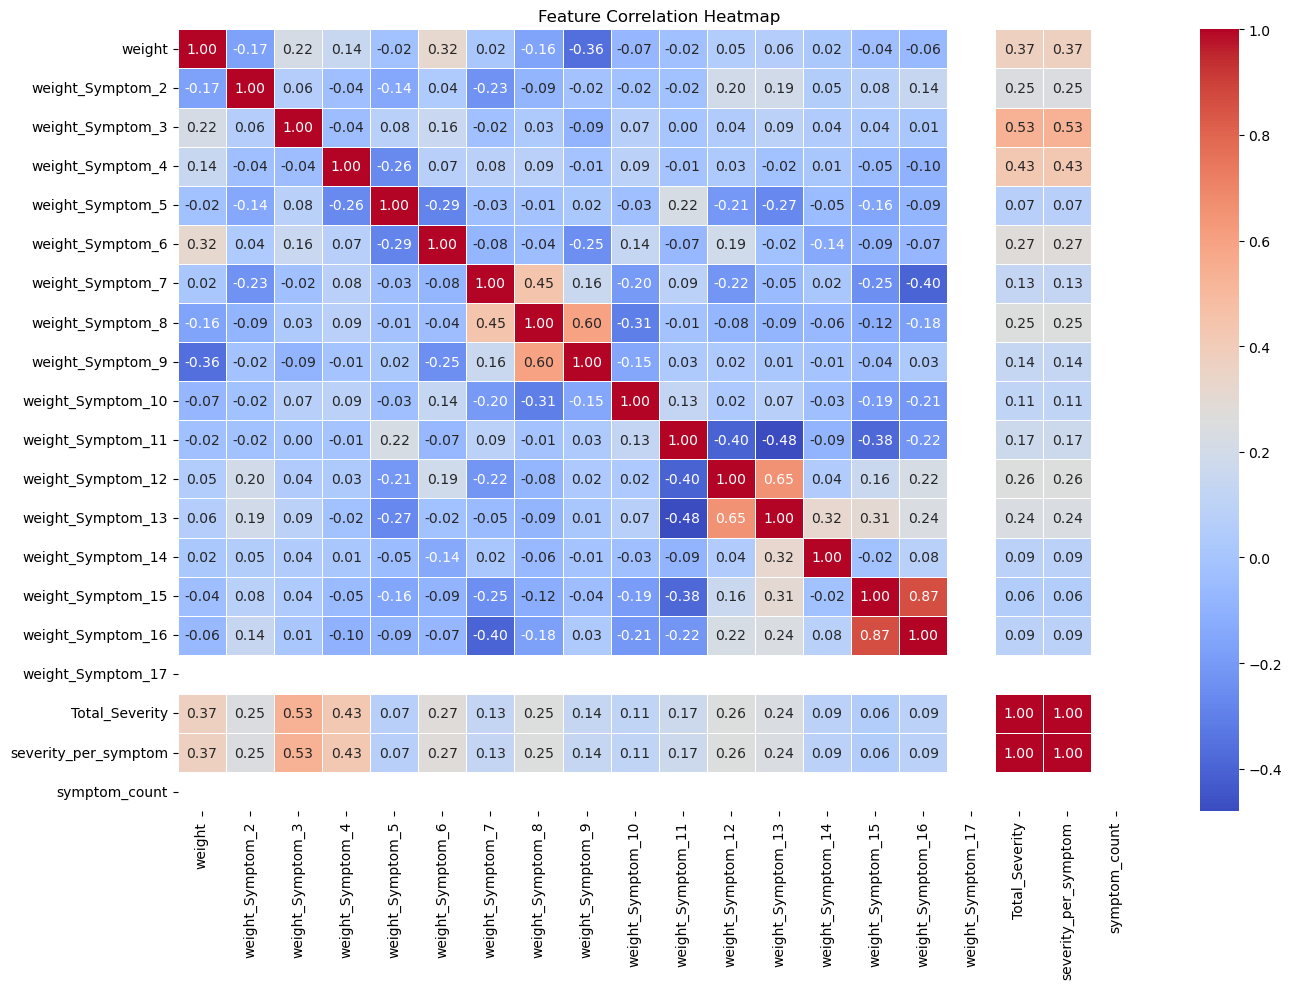

Missing columns: ['severity_per_symptom', 'symptom_count']


C:\Users\DELL\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\DELL\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\DELL\AppData\Local\Temp\ipykernel_15924\679315770.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation_with_Target', y='Feature', data=corr_df, palette='viridis')


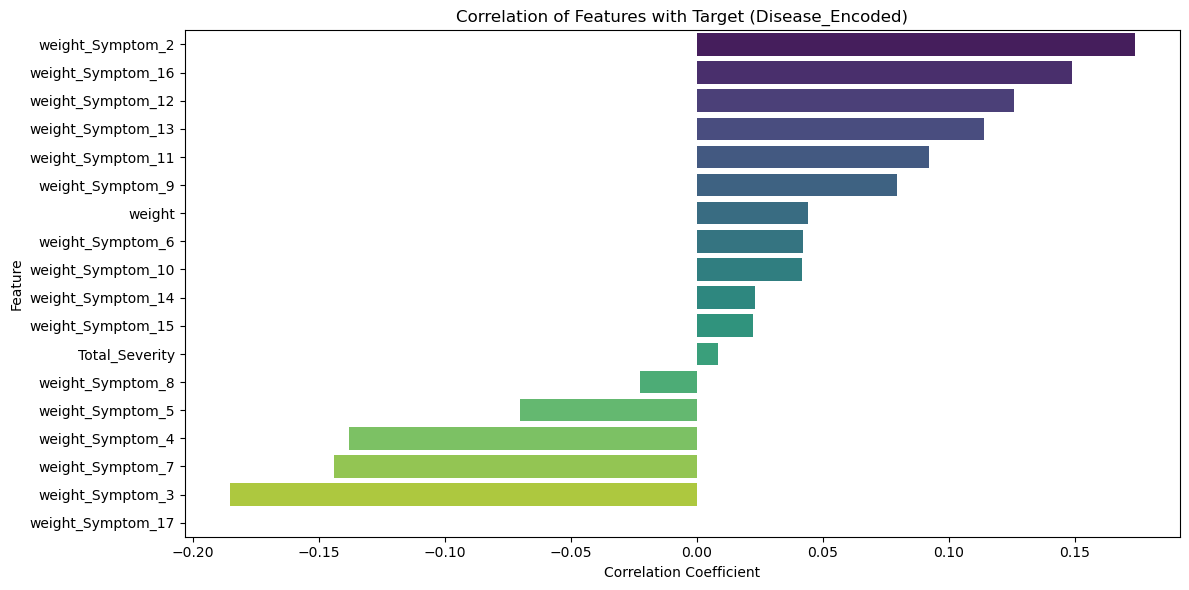

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of feature correlations
plt.figure(figsize=(14, 10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# Correlation of each numerical feature with the target
feature_target_corr = []

# Make sure all feature columns are present in the dataset
missing_cols = [col for col in features if col not in data.columns]
if missing_cols:
    print("Missing columns:", missing_cols)

# Calculate correlation of each feature with the target
for col in features:
    if col in data.columns and pd.api.types.is_numeric_dtype(data[col]):
        corr_val = data[col].corr(data[target])
        feature_target_corr.append((col, corr_val))

# Convert to DataFrame for plotting
corr_df = pd.DataFrame(feature_target_corr, columns=['Feature', 'Correlation_with_Target'])
corr_df = corr_df.sort_values(by='Correlation_with_Target', ascending=False)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Correlation_with_Target', y='Feature', data=corr_df, palette='viridis')
plt.title("Correlation of Features with Target (Disease_Encoded)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


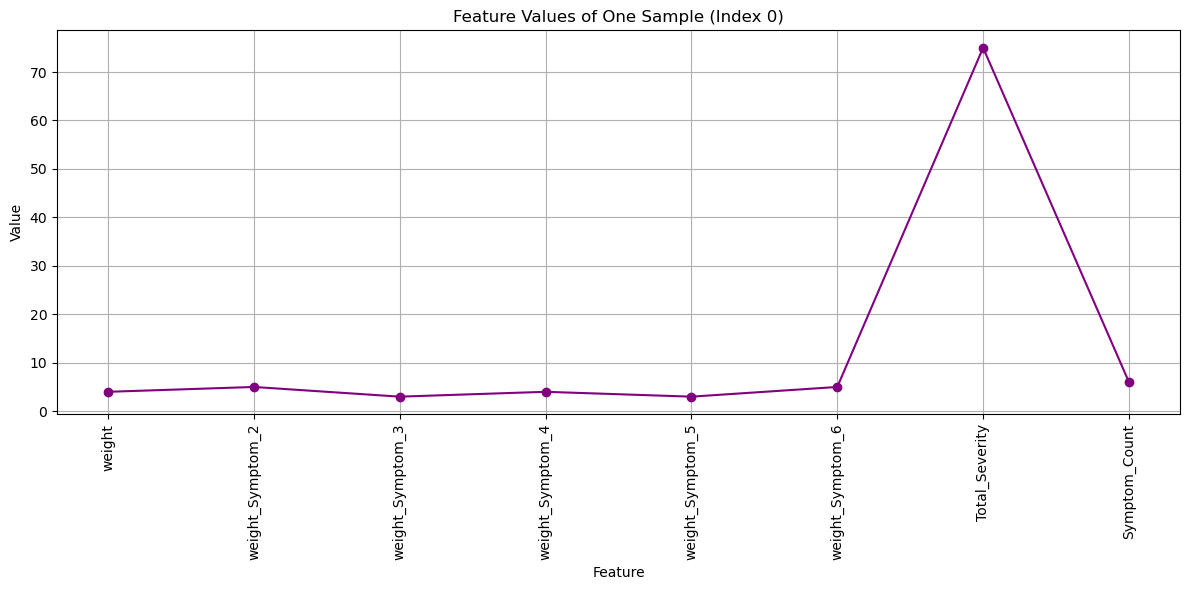

In [2]:
# Line Plot of Feature Values for One Sample (e.g., the first row)
sample = X.iloc[0]
plt.figure(figsize=(12, 6))
plt.plot(sample.index, sample.values, marker='o', linestyle='-', color='purple')
plt.title("Feature Values of One Sample (Index 0)")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

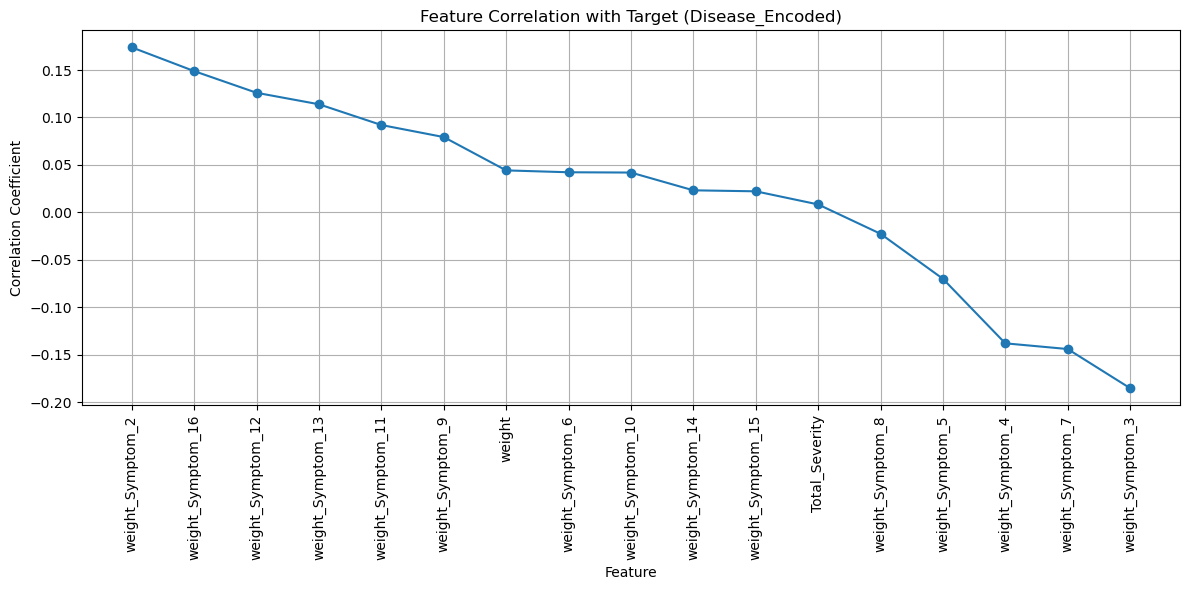

In [40]:
# Line Plot of Feature Correlation with Target
plt.figure(figsize=(12, 6))
plt.plot(corr_df['Feature'], corr_df['Correlation_with_Target'], marker='o', linestyle='-')
plt.title("Feature Correlation with Target (Disease_Encoded)")
plt.xlabel("Feature")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


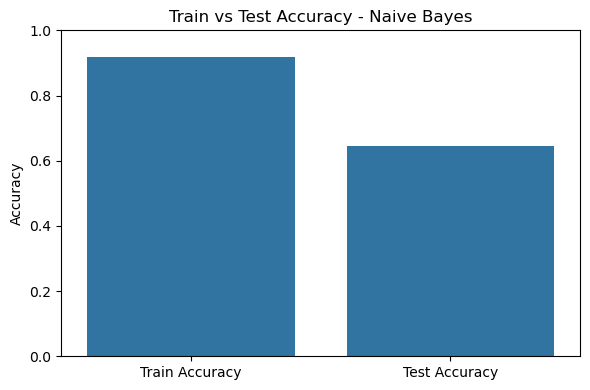

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Split data again (assuming X now has 'severity_per_symptom' and 'symptom_count')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Refit the model using updated features
model = GaussianNB()
model.fit(X_train, y_train)

# Step 3: Predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 4: Accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Step 5: Plot train vs test accuracy
plt.figure(figsize=(6, 4))
sns.barplot(x=["Train Accuracy", "Test Accuracy"], y=[train_accuracy, test_accuracy])
plt.ylim(0, 1)
plt.title("Train vs Test Accuracy - Naive Bayes")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()


In [45]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
# Output
print(f"Accuracy Score : {accuracy:.2f}")
print(f"Precision Score : {precision:.2f}")
print(f"Recall Score : {recall:.2f}")

Accuracy Score : 0.69
Precision Score : 0.69
Recall Score : 0.69



Available Symptoms:
itching, skin_rash, nodal_skin_eruptions, continuous_sneezing, shivering, chills, joint_pain, stomach_pain, acidity, vomiting, fatigue, weight_loss, headache, high_fever, nausea, loss_of_appetite, cough, cold, chest_pain, diarrhoea



Enter 5 or 6 symptoms (comma-separated):
 ache, high_fever, nausea, loss_of_appetite, cough, cold, chest_pain, diarrhoea



Entered Symptoms:
high_fever, nausea, loss_of_appetite, cough, cold, chest_pain

Predicted Disease:
psoriasis (Encoded: 36)

Model Performance:
Accuracy : 0.80
Precision: 0.78
Recall   : 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.67      0.67      0.67         3
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         2
           9       0.50      0.50      0.50         2
          10       1.00      0.50      0.67         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00   

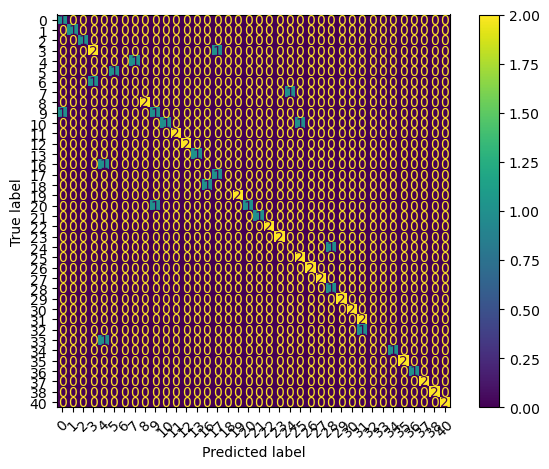

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Load and prepare data
data = pd.read_csv("cleaned_dataset.csv")

# Define features and target
base_features = [
    'weight', 'weight_Symptom_2', 'weight_Symptom_3',
    'weight_Symptom_4', 'weight_Symptom_5', 'weight_Symptom_6', 'Total_Severity'
]
target = 'Disease_Encoded'

# Clean data
model_data = data[base_features + [target]].dropna()
valid_classes = model_data[target].value_counts()[lambda x: x >= 2].index
model_data = model_data[model_data[target].isin(valid_classes)]

# Add new feature: number of non-zero symptom weights
model_data["Symptom_Count"] = (model_data[base_features[:-1]] > 0).sum(axis=1)
features = base_features + ["Symptom_Count"]

# Split data
X = model_data[features]
y = model_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest with tuned parameters
model = RandomForestClassifier(
    n_estimators=200,
    min_samples_leaf=2,
    max_depth=20,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train_scaled, y_train)

# Disease mapping
if 'Disease' in data.columns:
    disease_map = dict(zip(data['Disease_Encoded'], data['Disease']))
else:
    disease_map = {}

# Step 2: Symptom severity dictionary
symptom_severity = {
    "itching": 3, "skin_rash": 4, "nodal_skin_eruptions": 5, "continuous_sneezing": 4,
    "shivering": 4, "chills": 3, "joint_pain": 5, "stomach_pain": 6,
    "acidity": 4, "vomiting": 6, "fatigue": 4, "weight_loss": 3,
    "headache": 5, "high_fever": 6, "nausea": 5, "loss_of_appetite": 4,
    "cough": 3, "cold": 2, "chest_pain": 6, "diarrhoea": 5
}

# Show available symptoms
print("\nAvailable Symptoms:")
print(", ".join(symptom_severity.keys()))

# Step 3: User input
user_input = input("\nEnter 5 or 6 symptoms (comma-separated):\n").lower().strip().split(',')
user_symptoms = [s.strip() for s in user_input if s.strip() in symptom_severity][:6]

# Prepare weights
input_weights = []
total_severity = 0
for i in range(6):
    if i < len(user_symptoms):
        weight = symptom_severity[user_symptoms[i]]
    else:
        weight = 0
    input_weights.append(weight)
    total_severity += weight

# Add total severity and count
input_weights = input_weights[:6] + [total_severity]
symptom_count = sum([1 for w in input_weights[:6] if w > 0])
input_weights.append(symptom_count)

# Predict
input_df = pd.DataFrame([input_weights], columns=features)
input_scaled = scaler.transform(input_df)
predicted_disease = model.predict(input_scaled)[0]

# Step 4: Evaluate model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

# Output
print("\nEntered Symptoms:")
print(", ".join(user_symptoms))

print("\nPredicted Disease:")
if predicted_disease in disease_map:
    print(f"{disease_map[predicted_disease]} (Encoded: {predicted_disease})")
else:
    print(f"Encoded: {predicted_disease}")

print("\nModel Performance:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Optional: show confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, xticks_rotation=45)
plt.tight_layout()
plt.show()
